<a href="https://colab.research.google.com/github/tc3oliver/StratLabFreq/blob/dev/MACD_Divergence_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/StratLabFreq')
os.listdir()

['MACD_Divergence_Analysis.ipynb', 'data', 'TaipeiSansTCBeta-Regular.ttf']

In [50]:
import pandas as pd

In [51]:
dataframe = pd.read_json('./data/BTC_USDT-5m.json')
dataframe.columns=['date', 'open' , 'high', 'low', 'close', 'volume' ]
dataframe['date']=(pd.to_datetime(dataframe['date'],unit='ms'))
dataframe

,date,open,high,low,close,volume
0,2017-08-17 04:00:00,4261.48,4280.56,4261.48,4261.48,2.189061
1,2017-08-17 04:05:00,4261.48,4261.48,4261.48,4261.48,0.000000
2,2017-08-17 04:10:00,4261.48,4261.48,4261.48,4261.48,0.000000
3,2017-08-17 04:15:00,4261.48,4264.88,4261.48,4261.48,0.484666
4,2017-08-17 04:20:00,4264.88,4266.29,4264.88,4266.29,2.328570
...,...,...,...,...,...,...
617219,2023-07-06 05:50:00,30549.80,30569.99,30549.80,30563.11,105.865190
617220,2023-07-06 05:55:00,30563.11,30593.64,30563.11,30582.51,71.446400
617221,2023-07-06 06:00:00,30582.50,30599.30,30573.33,30575.48,88.509370
617222,2023-07-06 06:05:00,30575.48,30575.48,30560.00,30570.04,58.483620


In [52]:
!pip install mplfinance

In [81]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.font_manager as fm
import matplotlib as mpl

# 下載字體
# !wget https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download -O TaipeiSansTCBeta-Regular.ttf

# 註冊字體
# font_path = 'TaipeiSansTCBeta-Regular.ttf'
# prop = fm.FontProperties(fname=font_path)
# 設定 matplotlib 字體
# mpl.rcParams['font.family'] = prop.get_name()
# font={'font.family': prop.get_name()}
# style=mpf.make_mpf_style(base_mpf_style='default', rc=font)

In [100]:
import random

count = 40

def get_random_count_values_dataframe(df):
    if len(df) < count:
        raise ValueError("DataFrame 中的資料數量不足 40 個")

    start_index = random.randint(0, len(df) - count)

    selected_values = df.iloc[start_index : start_index + count]

    selected_df = pd.DataFrame(selected_values)

    return selected_df

In [102]:
def find_peak_sequence(data):
    peaks_index = []
    wave = []

    for i in range(len(data)):
        if i == len(data) - 1:
            break
        d = abs(data[i])
        if len(wave) == 0 or d > wave[-1]:
            wave.append(d)
        else:
            if len(wave) > 1:
                peaks_index.append(i-1)
            wave = [d]

    if len(wave) > 0:
        peaks_index.append(i)

    highlighted_points = [(index, data[index]) for index in peaks_index]

    temp = highlighted_points[-1]
    highlighted_points = highlighted_points[:-1]
    highlighted_points = sorted(highlighted_points, key=lambda x: abs(x[1]), reverse=True)[:2]
    highlighted_points = sorted(highlighted_points, key=lambda x: x[0], reverse=False)
    highlighted_points.append(temp)

    if len(highlighted_points) >= 3:
      if abs(highlighted_points[-3][1]) > abs(highlighted_points[-2][1]) > abs(highlighted_points[-1][1]):
        return True

    return False

In [106]:
def find_peak_sequence_logn_wrapper(data):
  count = sum(1 for value in data if value < 0)
  if count < (len(data) / 2):
    print(False)
    return False
  return find_peak_sequence(data)

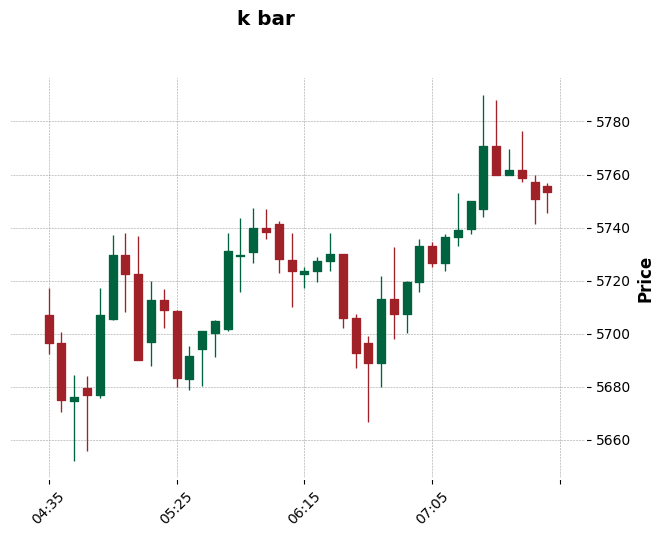

date
2018-11-15 04:35:00    0.0
2018-11-15 04:40:00    0.0
2018-11-15 04:45:00    0.0
2018-11-15 04:50:00    0.0
2018-11-15 04:55:00    0.0
2018-11-15 05:00:00    0.0
2018-11-15 05:05:00    0.0
2018-11-15 05:10:00    0.0
2018-11-15 05:15:00    0.0
2018-11-15 05:20:00    0.0
2018-11-15 05:25:00    0.0
2018-11-15 05:30:00    0.0
2018-11-15 05:35:00    0.0
2018-11-15 05:40:00    0.0
2018-11-15 05:45:00    0.0
2018-11-15 05:50:00    0.0
2018-11-15 05:55:00    0.0
2018-11-15 06:00:00    0.0
2018-11-15 06:05:00    0.0
2018-11-15 06:10:00    0.0
2018-11-15 06:15:00    0.0
2018-11-15 06:20:00    0.0
2018-11-15 06:25:00    0.0
2018-11-15 06:30:00    0.0
2018-11-15 06:35:00    0.0
2018-11-15 06:40:00    0.0
2018-11-15 06:45:00    0.0
2018-11-15 06:50:00    0.0
2018-11-15 06:55:00    0.0
2018-11-15 07:00:00    0.0
2018-11-15 07:05:00    0.0
2018-11-15 07:10:00    0.0
2018-11-15 07:15:00    0.0
2018-11-15 07:20:00    0.0
2018-11-15 07:25:00    0.0
2018-11-15 07:30:00    0.0
2018-11-15 07:35:00    

In [114]:
df = get_random_count_values_dataframe(dataframe)

# 將索引設定為 DatetimeIndex
df.set_index('date', inplace=True)

# 繪製 K 線圖
mpf.plot(df, type='candle', style='charles', title='k bar')

# 顯示圖表
plt.show()

df['bullish_macd_pattern'] = df['low'].rolling(window=count).apply(find_peak_sequence).fillna(0)
df['bullish_macd_pattern']

In [108]:
df['bullish_macd_pattern']

date
2023-03-26 17:35:00    0.0
2023-03-26 17:40:00    0.0
2023-03-26 17:45:00    0.0
2023-03-26 17:50:00    0.0
2023-03-26 17:55:00    0.0
2023-03-26 18:00:00    0.0
2023-03-26 18:05:00    0.0
2023-03-26 18:10:00    0.0
2023-03-26 18:15:00    0.0
2023-03-26 18:20:00    0.0
2023-03-26 18:25:00    0.0
2023-03-26 18:30:00    0.0
2023-03-26 18:35:00    0.0
2023-03-26 18:40:00    0.0
2023-03-26 18:45:00    0.0
2023-03-26 18:50:00    0.0
2023-03-26 18:55:00    0.0
2023-03-26 19:00:00    0.0
2023-03-26 19:05:00    0.0
2023-03-26 19:10:00    0.0
2023-03-26 19:15:00    0.0
2023-03-26 19:20:00    0.0
2023-03-26 19:25:00    0.0
2023-03-26 19:30:00    0.0
2023-03-26 19:35:00    0.0
2023-03-26 19:40:00    0.0
2023-03-26 19:45:00    0.0
2023-03-26 19:50:00    0.0
2023-03-26 19:55:00    0.0
2023-03-26 20:00:00    0.0
2023-03-26 20:05:00    0.0
2023-03-26 20:10:00    0.0
2023-03-26 20:15:00    0.0
2023-03-26 20:20:00    0.0
2023-03-26 20:25:00    0.0
2023-03-26 20:30:00    0.0
2023-03-26 20:35:00    